<a href="https://colab.research.google.com/github/luchofercho96/PROYECTO_DEBER/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
import random


Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0]==Y_train.shape[0]),"the number of the images u not equal to the number of the labels"
assert(X_test.shape[0]==Y_test.shape[0]),"the number of the images u not equal to the number of the labels"
assert(X_train.shape[1:]==(28,28)),"the dimensions of the image are not 28x28"
assert(X_test.shape[1:]==(28,28)),"the dimensions of the image are not 28x28"


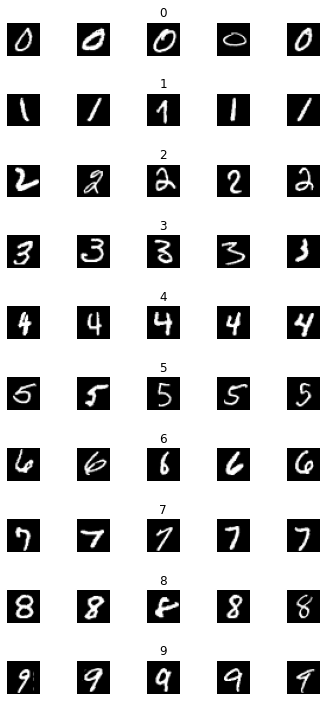

In [ ]:
num_of_samples=[]

cols=5
num_class=10

fig,axs=plt.subplots(nrows=num_class,ncols=cols,figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_class):
        
        x_selected=X_train[Y_train==j]
        axs[j][i].imshow(x_selected[np.random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        
        if i==2:
            
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

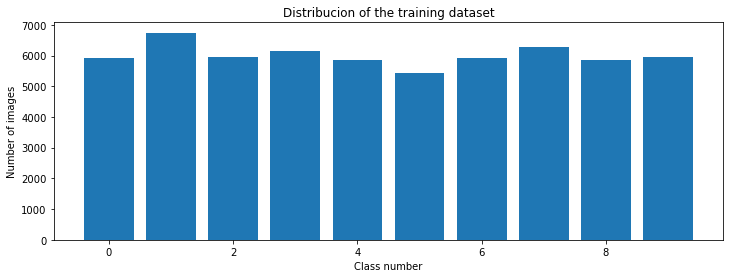

In [ ]:

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_class), num_of_samples)
plt.title("Distribucion of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")


In [ ]:
print(Y_train.shape)
Y_train=to_categorical(Y_train,10)
Y_test=to_categorical(Y_test,10)


(60000,)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=num_pixels,activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    

In [ ]:
model=create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=20,batch_size=200,verbose=1,shuffle=1)

Epoch 1/20
270/270 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8723 - val_loss: 0.1974 - val_accuracy: 0.9410
Epoch 2/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2336 - accuracy: 0.9307 - val_loss: 0.1680 - val_accuracy: 0.9510
Epoch 3/20
270/270 [==============================] - 1s 3ms/step - loss: 0.2021 - accuracy: 0.9390 - val_loss: 0.1686 - val_accuracy: 0.9503
Epoch 4/20
270/270 [==============================] - 1s 3ms/step - loss: 0.1904 - accuracy: 0.9426 - val_loss: 0.2027 - val_accuracy: 0.9430
Epoch 5/20
270/270 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9460 - val_loss: 0.1654 - val_accuracy: 0.9538
Epoch 6/20
270/270 [==============================] - 1s 3ms/step - loss: 0.1685 - accuracy: 0.9486 - val_loss: 0.1698 - val_accuracy: 0.9570
Epoch 7/20
270/270 [==============================] - 1s 3ms/step - loss: 0.1637 - accuracy: 0.9504 - val_loss: 0.1723 - val_accuracy: 0.9515
Epoch 

Text(0.5, 0, 'epochs')

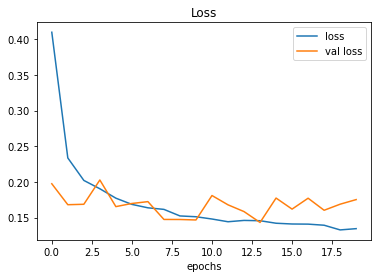

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

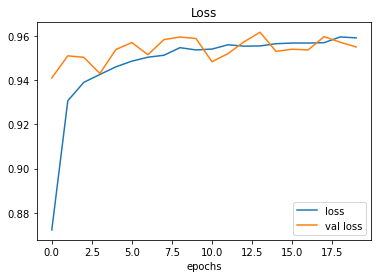

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [ ]:
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

[0.20752111077308655, 0.9449999928474426]


<Response [200]>


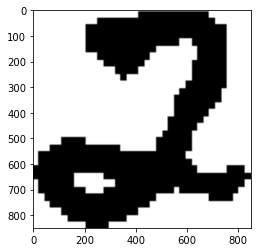

In [ ]:
import requests
from PIL import Image
url='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)
print(response)
img=Image.open(response.raw)
plt.imshow(img)

In [ ]:
import cv2
img_array=np.asarray(img)
print(img_array.shape)
resized=cv2.resize(img_array,(28,28))
gray=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray.shape)
FINAL=cv2.bitwise_not(gray)
gray=gray/255

FINAL=FINAL/255
print(FINAL)
print(gray)


(850, 850, 4)
(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.

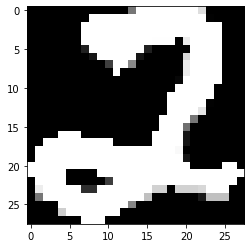

In [ ]:
plt.imshow(FINAL,cmap=plt.get_cmap("gray"))




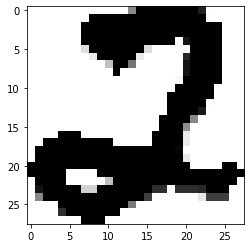

In [ ]:
plt.imshow(gray,cmap=plt.get_cmap("gray"))

In [ ]:
img=FINAL.reshape(1,784)
prediccion=model.predict_classes(img)
print("prdcion del digito",str(prediccion))

prdcion del digito [2]
